![Exercise 2.11](images/Exercise2.11-Sutton.jpeg)

In [1]:
import numpy as np

class Bandit:
    
    def __init__(self, mu = 1, k = 10):
        """
        By default creates an array of size k and mean of 1 which represents the q*(a).
        """
        self.Qstars = np.ones(k) * mu
        #print(self.Qstars)
        
    def __step(self):
        for i in range(0, len(self.Qstars)):
            self.Qstars[i] += np.random.normal(0, 0.01)
        #print(self.Qstars)
            
    def pull_a_bandit(self, lever):
        if lever < len(self.Qstars) and lever >=0:
            reward = np.random.normal(self.Qstars[lever], 1)
            self.__step()
            return reward
        else:
            raise Exception(f"Number {lever} out of range")
            
    def print_bandit_content(self):
        print(self.Qstars)

In [2]:
class Bandit_Agent:
    
    def __init__(self, bandit):
        self.action_values = np.zeros(10) # Q(a)
        self.counts = np.zeros(10) # N(a)
        self.iteration_number = 0
        self.total_reward = 0
        self.bandit = bandit
        
    def greedy_update(self):
        self.iteration_number += 1
        action_index = np.argmax(self.action_values) # Choose the best action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_update(self, epsilon=0.01):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + (reward - self.action_values[action_index])/self.counts[action_index]
        return self.total_reward/self.iteration_number
    
    def epsilon_greedy_constant_update(self, epsilon=0.1, alpha=0.1):
        self.iteration_number += 1
        if np.random.rand() > epsilon:
            action_index = np.argmax(self.action_values) # Choose the best action
        else:
            action_index = np.random.randint(0,10) # Choose a random action
        reward = self.bandit.pull_a_bandit(action_index) # Get the reward from the bandit
        self.total_reward += reward # Add the reward to the accumulated reward
        self.counts[action_index] += 1 # Increment the number of that action
        self.action_values[action_index] = self.action_values[action_index] + alpha * (reward - self.action_values[action_index])
        return self.total_reward/self.iteration_number
        
    def obj_print(self):
        print(f"{self.action_values},avg_reward={self.total_reward/self.iteration_number},best_action={self.best_action()}")
        
    def best_action(self):
        return np.max(self.action_values)

In [3]:
agent_constant_update_bandit = Bandit()
agent_constant_update = Bandit_Agent(bandit = agent_constant_update_bandit)

EPOCHS = 200000
epochs_for_average_last_rewards = 100000  
epsilons = np.array([1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1])
average_rewards = np.zeros(epsilons.shape)

for i in range(len(epsilons)):
    print(f"Doing epsilons[{i}] = {epsilons[i]} ...")
    for e in range(0,EPOCHS):
        #epsilon_greedy_constant_rewards[i] = agent_constant_update.epsilon_greedy_constant_update(epsilon=e, alpha=0.1) # Reading e from the outer for loop
        current_reward = agent_constant_update.epsilon_greedy_constant_update(epsilon=epsilons[i], alpha=0.1) # epsilons[i] sets the epsilon
        if e >= epochs_for_average_last_rewards:
            average_rewards[i] += current_reward
    average_rewards[i] /= epochs_for_average_last_rewards
    print(f"The average reward of epsilons[{i}] = {epsilons[i]} is equal to {average_rewards[i]}")

Doing epsilons[0] = 0.0078125 ...
The average reward of epsilons[0] = 0.0078125 is equal to 5.156657368221519
Doing epsilons[1] = 0.015625 ...
The average reward of epsilons[1] = 0.015625 is equal to 7.89433923096994
Doing epsilons[2] = 0.03125 ...
The average reward of epsilons[2] = 0.03125 is equal to 10.808010790627824
Doing epsilons[3] = 0.0625 ...
The average reward of epsilons[3] = 0.0625 is equal to 12.970861901844522
Doing epsilons[4] = 0.125 ...
The average reward of epsilons[4] = 0.125 is equal to 13.930962479650802
Doing epsilons[5] = 0.25 ...
The average reward of epsilons[5] = 0.25 is equal to 14.01437815472898
Doing epsilons[6] = 0.5 ...
The average reward of epsilons[6] = 0.5 is equal to 13.409294361301125
Doing epsilons[7] = 1.0 ...
The average reward of epsilons[7] = 1.0 is equal to 11.906292026038757


In [4]:
print(f"Max value occurs with epsilon = {epsilons[np.argmax(average_rewards)]}")

average_rewards

Max value occurs with epsilon = 0.25


array([ 5.15665737,  7.89433923, 10.80801079, 12.9708619 , 13.93096248,
       14.01437815, 13.40929436, 11.90629203])

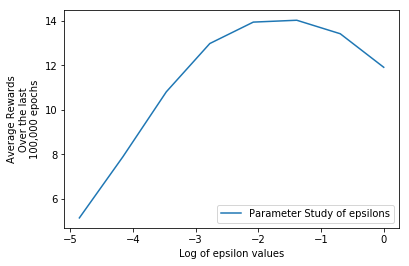

In [6]:
import matplotlib.pyplot as plt

x = np.arange(0, len(epsilons))
parameter_study_plot, = plt.plot(np.log(epsilons[x]),average_rewards[x])
plt.xlabel("Log of epsilon values")
plt.ylabel("Average Rewards\nOver the last\n100,000 epochs")
plt.legend([parameter_study_plot],["Parameter Study of epsilons"])
plt.show()